### **Project made by Juliette Bras and Alex Edward Debelka**

In [2]:
!pip install scikit-image

In [3]:
#Generated by Gemini (Prompt: Show me the code to mount Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import skimage as ski
from skimage.measure import regionprops
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, feature, color, img_as_float
import pandas as pd
from scipy.stats import skew, kurtosis

/tmp/ipython-input-1888567753.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(first_image)


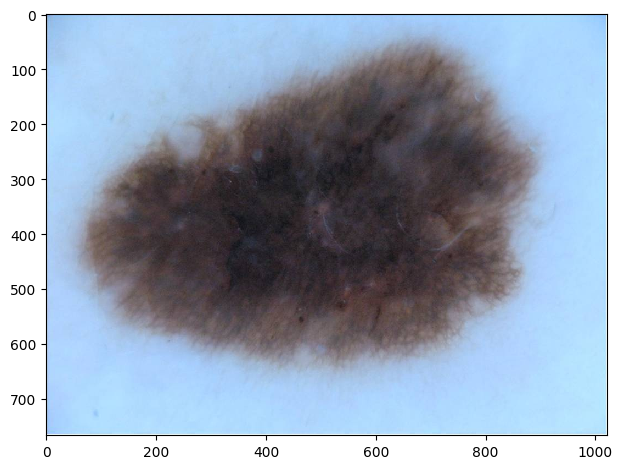

In [5]:
first_image= ski.io.imread("/content/drive/MyDrive/BME Classes /Machine Learning/Phase 1  small dataset for preprocessing and feature pool design-20251106/images/ISIC_0000000.jpg")

ski.io.imshow(first_image)

# Designing a feature pool + priorities to some features


* A- asymetrical
* B- border
* C- colors
* D- diameter
* E- evolving

The symmetry, border, diameter can be under the *shape* feature, color, texture are the other features

Importance of features in order:


1. shape
2. color
3. Texture





/tmp/ipython-input-317671393.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(blur_effect)


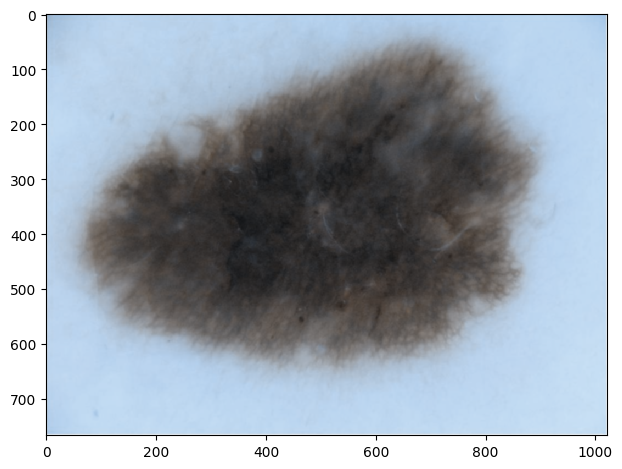

In [6]:
#Gaussian Blur
blur_effect= ski.filters.gaussian(first_image, sigma=1)
ski.io.imshow(blur_effect)

/usr/local/lib/python3.12/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
/tmp/ipython-input-1479571112.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(equalized_image)


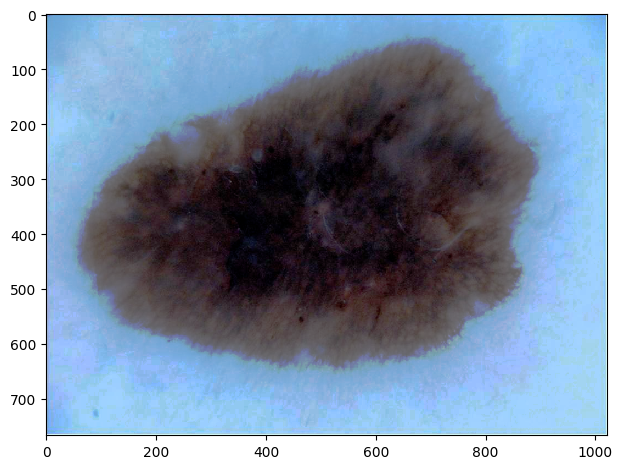

In [7]:
#Equalization (Adjusting the contrast)
equalized_image= ski.exposure.equalize_hist(first_image)
ski.io.imshow(equalized_image)

/tmp/ipython-input-3819831847.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(image_rescale)


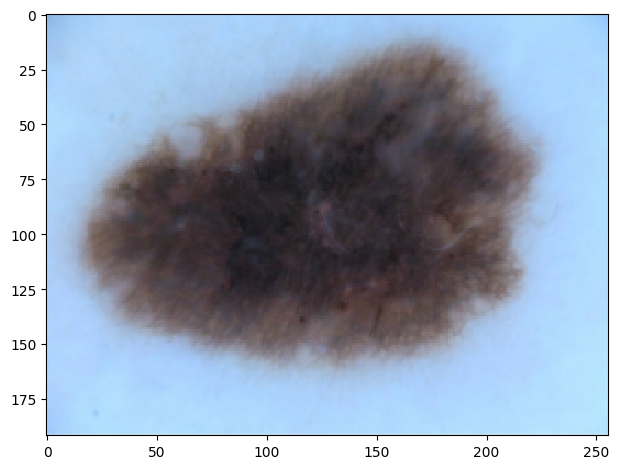

In [8]:
#Rescale image
image_rescale= ski.transform.rescale(first_image, scale=0.25, channel_axis= 2)
ski.io.imshow(image_rescale)

In [9]:
#Calculating the mean value of the R channel

r_channel= first_image[:,:,0]
mean_value= np.mean(r_channel)
print(mean_value)

131.88872191193994


/tmp/ipython-input-1520778202.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(binary_image)


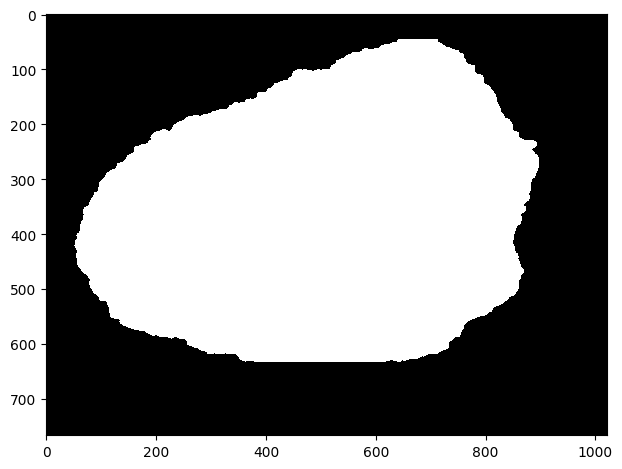

In [10]:
# Loading the binary image
binary_image= ski.io.imread("/content/drive/MyDrive/BME Classes /Machine Learning/Phase 1  small dataset for preprocessing and feature pool design-20251106/masks/ISIC_0000000_Segmentation.png")
ski.io.imshow(binary_image)

In [11]:
# Label connected regions of the image
labeled_image = measure.label(binary_image)

# Get region properties
regions = measure.regionprops(labeled_image)

for region in regions:
    print("Area of object:", region.area)


Area of object: 364956.0


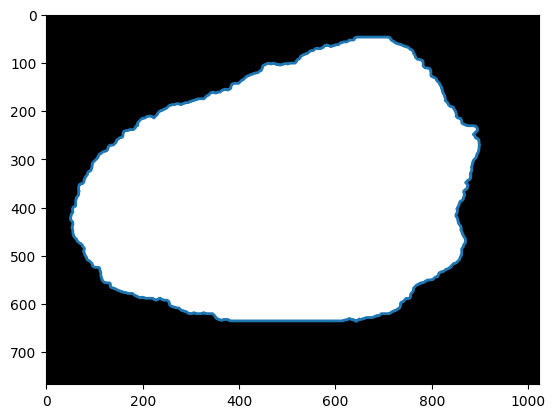

In [12]:
#Shape feature
contours= measure.find_contours(binary_image, 0.8)

fig, ax = plt.subplots()
ax.imshow(binary_image, cmap=plt.cm.gray)

for contour in contours:
  plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.show()

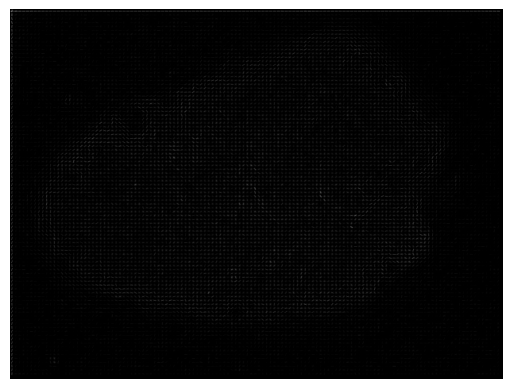

(426384,)


In [13]:
gray = color.rgb2gray(first_image)
gray = img_as_float(gray)

hog_vec, hog_img = feature.hog(
    gray,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm="L2-Hys",
    visualize=True
)

plt.imshow(hog_img, cmap="gray")
plt.axis("off")
plt.show()

# hog_vec is feature vector
print(hog_vec.shape)

In [14]:
#Color Feature

def stats(vals):
  return dict(
        mean=float(np.mean(vals)),
        median=float(np.median(vals)),
        std=float(np.std(vals)),
        q1=float(np.percentile(vals, 25)),
        q3=float(np.percentile(vals, 75)),
        skew=float(skew(vals, bias=False)),
        kurt=float(kurtosis(vals, fisher=True, bias=False)),
        entropy=float(measure.shannon_entropy(vals))
    )

R = first_image[:, :, 0]
G = first_image[:, :, 1]
B = first_image[:, :, 2]

color_stats_rgb = {}

for i, channel in enumerate([R, G, B]):
  val= channel[binary_image > 0]
  channel_name = ['R', 'G', 'B'][i]
  color_stats_rgb[channel_name] = stats(val)

lab_image = color.rgb2lab(first_image)

L = lab_image[:, :, 0]
A = lab_image[:, :, 1]
B = lab_image[:, :, 2]

color_stats_lab = {}

for i, channel in enumerate([L, A, B]):
  val= channel[binary_image > 0]
  channel_name = ['L', 'A', 'B'][i]
  color_stats_lab[channel_name] = stats(val)

color_stats_rgb_df = pd.DataFrame(color_stats_rgb)
print("RGB Color Stats DataFrame:")
display(color_stats_rgb_df)

color_stats_lab_df = pd.DataFrame(color_stats_lab)
print("\nLAB Color Stats DataFrame:")
display(color_stats_lab_df)

RGB Color Stats DataFrame:


,R,G,B
mean,86.632871,78.636808,84.051231
median,79.000000,67.000000,71.000000
std,36.083584,39.249347,42.775089
q1,57.000000,47.000000,52.000000
q3,114.000000,102.000000,103.000000
skew,0.436292,0.870893,1.110075
kurt,-0.943136,-0.271248,0.284410
entropy,7.008366,6.996606,7.041106



LAB Color Stats DataFrame:


,L,A,B
mean,33.788177,4.646891,-1.809125
median,29.709197,4.866773,-1.577664
std,16.132808,2.333531,4.214314
q1,20.835175,3.252216,-3.843127
q3,44.247351,6.176359,0.827777
skew,0.693397,-0.218679,-0.833603
kurt,-0.553342,0.240962,1.287186
entropy,12.490512,12.490512,12.490512


In [22]:
# Texture feature
distances = [1, 3, 5]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

gray_image_uint8 = (gray * 255).astype(np.uint8)
glcm = feature.graycomatrix(gray_image_uint8, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM', 'entropy']
texture_features = np.hstack([feature.graycoprops(glcm, prop).ravel() for prop in properties])
print("Shape of texture features:", texture_features.shape)

feature_names = []
for prop in properties:
    for d in distances:
        for a in angles:
            angle_degrees = int(np.degrees(a))
            feature_names.append(f'{prop}_d{d}_a{angle_degrees}')

texture_features_df = pd.DataFrame([texture_features], columns=feature_names)
display(texture_features_df)

Shape of texture features: (84,)


,contrast_d1_a0,contrast_d1_a45,contrast_d1_a90,contrast_d1_a135,contrast_d3_a0,contrast_d3_a45,contrast_d3_a90,contrast_d3_a135,contrast_d5_a0,contrast_d5_a45,...,entropy_d1_a90,entropy_d1_a135,entropy_d3_a0,entropy_d3_a45,entropy_d3_a90,entropy_d3_a135,entropy_d5_a0,entropy_d5_a45,entropy_d5_a90,entropy_d5_a135
0,7.439003,15.582124,8.806855,15.007021,17.522269,23.794148,19.571739,21.749737,26.995073,40.591804,...,6.620694,6.9223,7.265269,7.315868,7.278811,7.257664,7.501898,7.639786,7.513862,7.564931
